## Make plot ERF 2019


This script uses code produced by Bill Collins to produce an emission based estimate of ERF in 2019 vs 1750 based on Thornhill et al 2021. 


Thornhill, Gillian D., William J. Collins, Ryan J. Kramer, Dirk Olivié, Ragnhild B. Skeie, Fiona M. O’Connor, Nathan Luke Abraham, et al. “Effective Radiative Forcing from Emissions of Reactive Gases and Aerosols – a Multi-Model Comparison.” Atmospheric Chemistry and Physics 21, no. 2 (January 21, 2021): 853–74. https://doi.org/10.5194/acp-21-853-2021.


In [13]:
import pandas as pd
import numpy.testing
from numpy.testing import assert_allclose
from ar6_ch6_rcmipfigs.utils.plot import get_chem_col
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR, INPUT_DATA_DIR
from pathlib import  Path
import numpy as np
import matplotlib.pyplot as plt

### Output filenames.

In [14]:
# standard deviation filename:
fn_sd = RESULTS_DIR/'tables_historic_attribution/table_uncertainties_smb_plt.csv'
# mean filename
fn_mean = RESULTS_DIR/'tables_historic_attribution/table_mean_smb_plt.csv'

## Get tables from script from Bill

In [15]:
from util_hist_att import attribution_1750_2019_v2_smb

[2.05755418 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.30980392156862746, 0.3215686274509804, 0.7176470588235294)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)


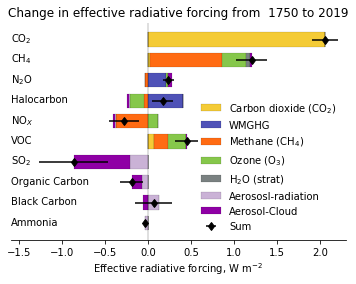

In [16]:
table, table_sd = attribution_1750_2019_v2_smb.main(plot=True)

In [17]:
table.sum()#_sd

CO2             2.144647
GHG             0.620000
CH4_lifetime    0.540000
O3              0.480930
O3_prime       -0.010930
Strat_H2O       0.050000
Aerosol        -0.220000
Cloud          -0.803708
Total           2.800939
dtype: float64

In [18]:
import matplotlib.pyplot as plt
import numpy as np

## Scale cloud forcing to fit mest estimate 0.84

In [19]:
table_c = table.copy()
correct_cloud_forcing = - 0.84
scale_fac = correct_cloud_forcing/table.sum()['Cloud']
table_c['Cloud']=scale_fac*table['Cloud']
table_c.sum()

CO2             2.144647
GHG             0.620000
CH4_lifetime    0.540000
O3              0.480930
O3_prime       -0.010930
Strat_H2O       0.050000
Aerosol        -0.220000
Cloud          -0.840000
Total           2.800939
dtype: float64

## Add together O3 primary and O3

In [20]:
o3_sum = table_c['O3']+table_c['O3_prime']
tab2 = table_c.copy(deep=True).drop(['O3','O3_prime','Total'], axis=1)
tab2['O3'] = o3_sum

## Replace GHG with N2O and HC

In [21]:
table_ed = tab2.copy(deep=True)
_ghg = tab2.loc['HC','GHG']
table_ed.loc['HC','GHG'] = 0
table_ed['HC'] = 0
table_ed.loc['HC','HC']=_ghg
table_ed
_ghg = tab2.loc['N2O','GHG']
table_ed.loc['N2O','GHG'] = 0
table_ed['N2O']=0
table_ed.loc['N2O','N2O']=_ghg
table_ed = table_ed.drop('GHG', axis=1)
table_ed

,CO2,CH4_lifetime,Strat_H2O,Aerosol,Cloud,O3,HC,N2O
Species,,,,,,,,
CO2,2.057554,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
CH4,0.017549,0.844457,0.05,-0.003448,0.018421,0.279179,0.00,0.00
N2O,0.000000,-0.035967,0.00,-0.002717,0.042503,0.024311,0.00,0.21
HC,0.000053,-0.050927,0.00,-0.010501,-0.017419,-0.164586,0.41,0.00
NOx,0.000000,-0.380025,0.00,-0.011912,-0.014458,0.120237,0.00,0.00
VOC,0.069491,0.162462,0.00,-0.003344,0.008884,0.210860,0.00,0.00
SO2,0.000000,0.000000,0.00,-0.214702,-0.683985,0.000000,0.00,0.00
OC,0.000000,0.000000,0.00,-0.066129,-0.133067,0.000000,0.00,0.00
BC,0.000000,0.000000,0.00,0.123707,-0.060878,0.000000,0.00,0.00


 No need to fix std because we only use the total (which is not influenced by the summation above). 

In [22]:
table_sd

,CO2_sd,GHG_sd,CH4_lifetime_sd,O3_sd,O3_prime_sd,Strat_H2O_sd,Aerosol_sd,Cloud_sd,Total_sd
Species,,,,,,,,,
CO2,0.246907,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.246907
CH4,0.002106,0.089942,0.047124,0.036693,0.022592,0.05,0.002856,0.092581,0.182717
N2O,0.000000,0.029400,0.028548,0.015462,0.003696,0.00,0.002627,0.042169,0.061899
HC,0.000006,0.057400,0.032639,0.077735,0.005206,0.00,0.002561,0.049554,0.117053
NOx,0.000000,0.000000,0.107711,0.088303,0.034382,0.00,0.005903,0.057188,0.173085
VOC,0.008339,0.000000,0.059041,0.057143,0.017918,0.00,0.006582,0.098979,0.137949
SO2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.205242,0.345009,0.401442
OC,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.060004,0.120197,0.134342
BC,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.135916,0.164055,0.213043


Write tables to file.

In [23]:
table_ed.to_csv(RESULTS_DIR/'tables_historic_attribution/table_mean_smb_orignames.csv')
table_sd.to_csv(RESULTS_DIR/'tables_historic_attribution/table_std_smb_orignames.csv')

In [24]:
from ar6_ch6_rcmipfigs.utils.plot import get_chem_col

Variables in the rigth order:

In [25]:
varn = ['co2','N2O','HC','ch4','o3','H2O_strat','ari','aci']
var_dir = ['CO2','N2O','HC','CH4_lifetime','O3','Strat_H2O','Aerosol','Cloud']

Colors:

In [26]:
cols = [get_chem_col(var) for var in varn]

(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.8274509803921568, 0.0, 0.1568627450980392)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)


## Uncertainty:

We have the standard deviation, but would like the use the standard error of the mean AND we would like to calculate the 5-95th percentile. 

We have the standard deviation (as far as I can tell, not the unbiased one)

$\sigma=\sqrt {\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n}}$

The unbiased estimator would be:

$s=\sqrt {\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n-1}} = \sigma \cdot \sqrt{ \frac{n}{n-1}}$

The standard error is:

$SE = \frac{\sigma}{n}$

Finally, we want 5-95th percentile. Assuming normal distribution, this amounts to multiplying the standard error by 1.645

In [27]:
std_2_95th = 1.645

In [28]:
import pandas as pd
num_mod_lab = 'Number of models (Thornhill 2020)'
thornhill = pd.read_csv(INPUT_DATA_DIR/'table2_thornhill2020.csv', index_col=0)
thornhill.index = thornhill.index.rename('Species')
thornhill

,n,Number of models (Thornhill 2020)
Species,,
BC,6,7
CH4,7,8
N2O,4,5
HC,4,6
NOx,4,5
VOC,4,5
SO2,5,6
OC,5,6
NH3,2,2


![](thornhill.jpg)

In [29]:
sd_tot = table_sd['Total_sd']
df_err= pd.DataFrame(sd_tot.rename('std'))
df_err['SE'] = df_err

df_err['SE'] = df_err['std']/np.sqrt(thornhill[num_mod_lab])
df_err['95-50_SE'] = df_err['SE']*std_2_95th
df_err.loc['CO2','95-50_SE']= df_err.loc['CO2','std']
df_err

df_err['95-50'] = df_err['std']*std_2_95th
df_err.loc['CO2','95-50']= df_err.loc['CO2','std']
df_err

,std,SE,95-50_SE,95-50
Species,,,,
CO2,0.246907,NaN,0.246907,0.246907
CH4,0.182717,0.064600,0.106267,0.300569
N2O,0.061899,0.027682,0.045537,0.101825
HC,0.117053,0.047787,0.078609,0.192552
NOx,0.173085,0.077406,0.127333,0.284725
VOC,0.137949,0.061693,0.101484,0.226926
SO2,0.401442,0.163888,0.269596,0.660372
OC,0.134342,0.054845,0.090220,0.220992
BC,0.213043,0.080523,0.132460,0.350455


## Rename some variables

In [30]:
rename_dic_cat = {
    'CO2':'Carbon dioxide (CO$_2$)',
    'GHG':'WMGHG',
    'CH4_lifetime': 'Methane (CH$_4$)',
    'O3': 'Ozone (O$_3$)',
    'Strat_H2O':'H$_2$O (strat)',
    'Aerosol':'Aerosol-radiation',
    'Cloud':'Aerosol-cloud',
    'N2O':'N$_2$O',
    'HC':'CFC + HCFC',

}
rename_dic_cols ={
    'CO2':'CO$_2$',
    'CH4':'CH$_4$',
    'N2O':'N$_2$O',
    'HC':'CFC + HCFC',
    'NOx':'NO$_x$',
    'VOC':'NMVOC + CO',
    'SO2':'SO$_2$',
    'OC':'Organic carbon',
    'BC':'Black carbon',
    'NH3':'Ammonia'
}
tab_plt = table_ed.loc[::-1,var_dir].rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
tab_plt

,Carbon dioxide (CO$_2$),N$_2$O,CFC + HCFC,Methane (CH$_4$),Ozone (O$_3$),H$_2$O (strat),Aerosol-radiation,Aerosol-cloud
Species,,,,,,,,
Ammonia,0.000000,0.00,0.00,0.000000,0.000000,0.00,-0.030954,0.000000
Black carbon,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.123707,-0.060878
Organic carbon,0.000000,0.00,0.00,0.000000,0.000000,0.00,-0.066129,-0.133067
SO$_2$,0.000000,0.00,0.00,0.000000,0.000000,0.00,-0.214702,-0.683985
NMVOC + CO,0.069491,0.00,0.00,0.162462,0.210860,0.00,-0.003344,0.008884
NO$_x$,0.000000,0.00,0.00,-0.380025,0.120237,0.00,-0.011912,-0.014458
CFC + HCFC,0.000053,0.00,0.41,-0.050927,-0.164586,0.00,-0.010501,-0.017419
N$_2$O,0.000000,0.21,0.00,-0.035967,0.024311,0.00,-0.002717,0.042503
CH$_4$,0.017549,0.00,0.00,0.844457,0.279179,0.05,-0.003448,0.018421


In [31]:
df_err = df_err.rename(rename_dic_cols, axis=0)
df_err.to_csv(fn_sd)
tab_plt.to_csv(fn_mean)

In [32]:
width = 0.7
kwargs = {'linewidth':.1,'edgecolor':'k'}

In [33]:
import seaborn as sns

In [34]:
ybar = np.arange(len(tab_plt)+1)#, -1)
ybar

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [35]:
table_ed.sum(axis=0)

CO2             2.144647
CH4_lifetime    0.540000
Strat_H2O       0.050000
Aerosol        -0.220000
Cloud          -0.840000
O3              0.470000
HC              0.410000
N2O             0.210000
dtype: float64

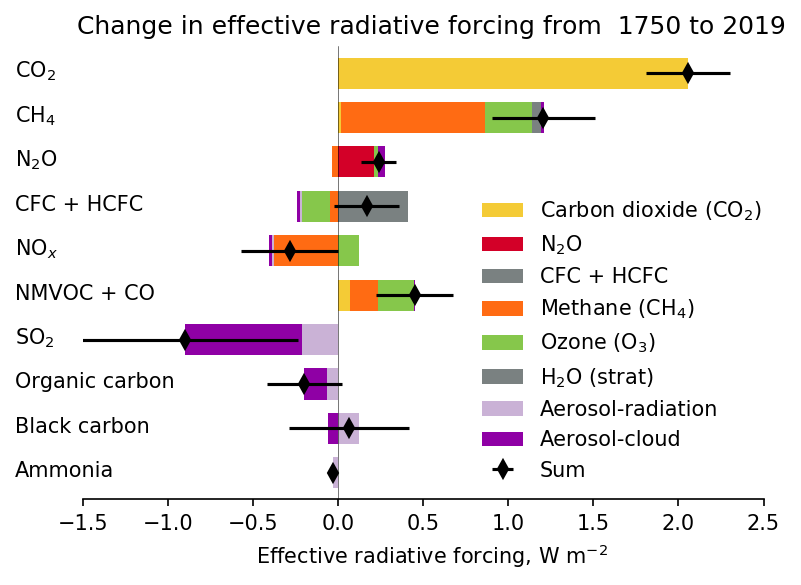

In [24]:
fig, ax = plt.subplots(dpi=150)#figsize=[10,10])


tab_plt.plot.barh(stacked=True, color=cols, linewidth=.0, edgecolor='k',ax=ax, width=width)
tot = table_ed.sum(axis=1)[::-1]#table_ed['Total'][::-1]
xerr = df_err['95-50'][::-1]
y = np.arange(len(tot))
plt.errorbar(tot, y,xerr=xerr,marker='d', linestyle='None', color='k', label='Sum', )
plt.legend(frameon=False)
ax.set_ylabel('')
sns.despine()





for lab, y in zip(tab_plt.index, ybar):
        #plt.text(-1.55, ybar[i], species[i],  ha='left')#, va='left')
    plt.text(-1.9, y-0.1, lab,  ha='left')#, va='left')
plt.title('Change in effective radiative forcing from  1750 to 2019')
plt.xlabel(r'Effective radiative forcing, W m$^{-2}$')
plt.xlim(-1.5, 2.6)
    #plt.xlim(-1.6, 2.0)
sns.despine(fig, left=True, trim=True)
plt.legend(loc='lower right', frameon=False)
plt.axvline(x=0., color='k', linewidth=0.25)
fn = 'attribution_1750_2019_5-95th.png'
fp = RESULTS_DIR /'figures_historic_attribution'/fn
fp.parent.mkdir(parents=True, exist_ok=True)
ax.set_yticks([])

plt.savefig(fp, dpi=300)
plt.savefig(fp.with_suffix('.pdf'), dpi=300)
plt.show()

In [36]:
tab_plt

,Carbon dioxide (CO$_2$),N$_2$O,CFC + HCFC,Methane (CH$_4$),Ozone (O$_3$),H$_2$O (strat),Aerosol-radiation,Aerosol-cloud
Species,,,,,,,,
Ammonia,0.000000,0.00,0.00,0.000000,0.000000,0.00,-0.030954,0.000000
Black carbon,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.123707,-0.060878
Organic carbon,0.000000,0.00,0.00,0.000000,0.000000,0.00,-0.066129,-0.133067
SO$_2$,0.000000,0.00,0.00,0.000000,0.000000,0.00,-0.214702,-0.683985
NMVOC + CO,0.069491,0.00,0.00,0.162462,0.210860,0.00,-0.003344,0.008884
NO$_x$,0.000000,0.00,0.00,-0.380025,0.120237,0.00,-0.011912,-0.014458
CFC + HCFC,0.000053,0.00,0.41,-0.050927,-0.164586,0.00,-0.010501,-0.017419
N$_2$O,0.000000,0.21,0.00,-0.035967,0.024311,0.00,-0.002717,0.042503
CH$_4$,0.017549,0.00,0.00,0.844457,0.279179,0.05,-0.003448,0.018421
